## Introduction to Gradient Descent

In this notebook, we will go through a most basic machine learning algorithm which is linear regression and implement the gradient descent to find out the local minimum for regression model.

Here we'll create a model that predicts crop yield for apple in given dummy dataset which is consist of three feature columns and one target column. Dataset is here:

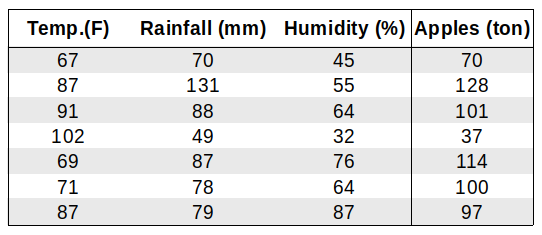

In linear regression model, each target value is calculated as weighted sum of input variables (*feature matrix*) with additional constant called biases. So the given equation would be:

    predicted_yield = Temp * w1 + Rainfall * w2 + Humidity * w3 + b1


### Import Standard Libraries

In [1]:
import numpy as np
import pandas as pd

### Import Dummy Dataset

In [2]:
dataset = pd.read_csv('yield.csv')

In [3]:
dataset

,Temp.(F),Rainfall(mm),Humidity(%),Apple(ton)
0,67,70,45,70
1,87,131,55,128
2,91,88,64,101
3,102,49,32,37
4,69,87,76,114
5,71,78,64,100
6,87,79,87,97


### Spliting Feature and Target Columns

In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
X, y

(array([[ 67,  70,  45],
        [ 87, 131,  55],
        [ 91,  88,  64],
        [102,  49,  32],
        [ 69,  87,  76],
        [ 71,  78,  64],
        [ 87,  79,  87]]),
 array([ 70, 128, 101,  37, 114, 100,  97]))

### Gradient Descent

Gradient Descent is a first-order optimization techniques that find value in each iteration for *w[]* and *b* such that the predicted values gets closer to the target value. With each iteration (*epoch*) the step towards finding suitable value for *w[]* and *b* get decreased which is described in the following digram:
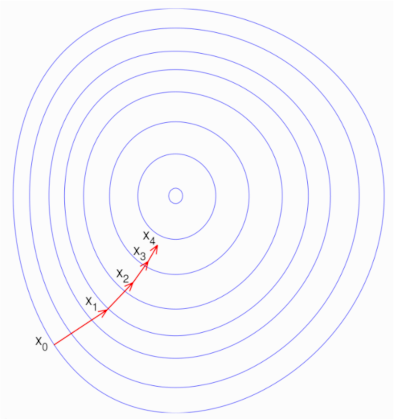

### Linear Regression Model

In [6]:
def linear_model(X_train, y_train, epochs, lr=1e-1):
    """implements y = X_train.T(w) + b to find the predicted value """
    
    w = np.random.rand(1, X_train.shape[1])
    b = np.random.rand(1)
    iteration = 1
    
    for i in range(epochs):
        y_pred = (X.dot(np.transpose(w)) + b).flatten()
        error = y - y_pred
        w_grad = -(1.0/len(X_train))*error.dot(X_train)*lr
        loss = np.sum(error)
        b_grad = -(1.0/len(X_train))*loss*lr
        w = w - w_grad
        b = b - b_grad
        if(iteration % 100 == 0):
            print('Iteration: {}, Loss: {}'.format(iteration, loss))
        
        iteration += 1

    return y_pred
    

### Prediction and Loss 

In [7]:
y_pred = linear_model(X, y, epochs=1000, lr=1e-5)

Iteration: 100, Loss: -2.8490318315442877
Iteration: 200, Loss: -1.6793302918868704
Iteration: 300, Loss: -0.8908802424695423
Iteration: 400, Loss: -0.3611339037208836
Iteration: 500, Loss: -0.006566642531588229
Iteration: 600, Loss: 0.22966917029752665
Iteration: 700, Loss: 0.3862018540273411
Iteration: 800, Loss: 0.48923039967088755
Iteration: 900, Loss: 0.5564851602030885
Iteration: 1000, Loss: 0.5999348376233726


In [8]:
y_pred

array([ 74.7634844 , 131.5902494 ,  96.51967575,  37.32864858,
       109.38192511,  92.96778314, 103.84829878])

In [9]:
y

array([ 70, 128, 101,  37, 114, 100,  97])